In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


classes = pd.read_csv("../data/bio-pathways-diseaseclasses.csv")
name_to_class = {row["Disease Name"]: row["Disease Class"] for _, row in classes.iterrows()}
classes = set(name_to_class.values())
classes_to_n = {class_: i for i, class_ in enumerate(classes)}
features = pd.read_csv("../data/bio-pathways-features.csv").dropna()
motifs = pd.read_csv("../data/bio-pathways-diseasemotifs.csv").dropna()


In [14]:
len(classes)

30

In [15]:
y = features.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = features.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((297, 5), (297,))

Text(0.5, 1.0, 'PCA')

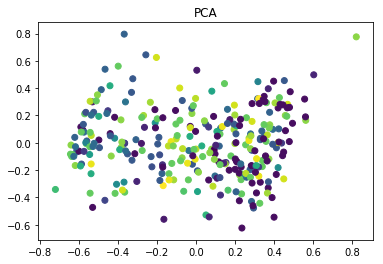

In [16]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
plt.scatter(Xp[:,0], Xp[:, 1], c=y)
plt.title("PCA")

Text(0.5, 1.0, 'TSNE')

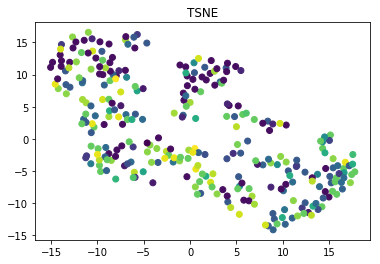

In [17]:
tsne = TSNE(n_components=2)
Xpp = tsne.fit_transform(X)
plt.scatter(Xpp[:,0], Xpp[:, 1], c=y)
plt.title("TSNE")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=25)

# accuracy using features
svc = SVC(kernel="linear")
lr = LogisticRegression(max_iter=1000)
svc.fit(X_train, y_train)
lr.fit(X_train, y_train)

svc.score(X_test, y_test), lr.score(X_test, y_test)

(0.25333333333333335, 0.26666666666666666)

In [19]:
y = motifs.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = motifs.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((300, 73), (300,))

Text(0.5, 1.0, 'PCA')

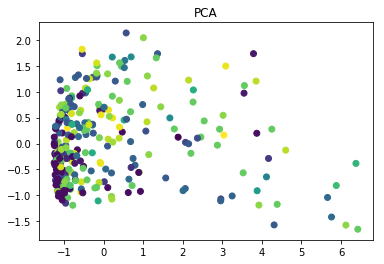

In [20]:
Xp = pca.fit_transform(X)
plt.scatter(Xp[:,0], Xp[:,1], c=y)
plt.title("PCA")

Text(0.5, 1.0, 'TSNE')

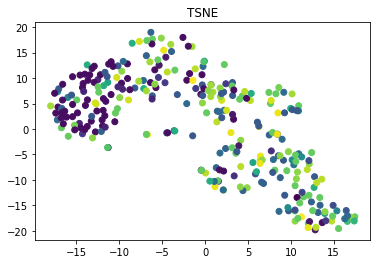

In [21]:
Xpp = tsne.fit_transform(X)
plt.scatter(Xpp[:,0], Xpp[:, 1], c=y)
plt.title("TSNE")

In [24]:
# accuracy using features
svc = SVC(kernel="linear")
lr = LogisticRegression(max_iter=1000)
svc.fit(X, y)
lr.fit(X, y)

svc.score(X, y), lr.score(X, y)

(0.4666666666666667, 0.45)

In [23]:
motifs

,Disease ID,Disease Name,P-values for each orbit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,C0036095,Salivary Gland Neoplasms,0.2868,0.1406,1.0000,0.9996,0.1822,0.9994,0.2686,0.9998,...,0.9992,1.0000,0.9988,0.9978,0.9996,0.9998,1.0000,0.9908,0.9980,0.9944
1,C0033941,"Psychoses, Substance-Induced",0.6732,0.2918,0.9986,0.9854,0.4228,0.9984,0.0696,0.9970,...,0.9872,0.9862,0.9308,0.9812,0.9788,0.9660,0.9962,0.9724,0.9730,0.9844
2,C0043459,Zellweger Syndrome,0.5018,0.4802,0.7728,0.7928,0.2640,0.8392,0.4160,0.7320,...,0.7040,0.5930,0.8620,0.8434,0.8360,0.6456,0.0000,0.8376,0.9066,0.0000
3,C0033860,Psoriasis,0.0034,0.0000,0.9802,0.9884,0.0000,0.9894,0.0446,0.9944,...,0.9486,0.9218,0.9586,0.9618,0.9618,0.8456,0.0000,0.8756,0.0000,0.0000
4,C0027726,Nephrotic Syndrome,0.3848,0.0756,1.0000,0.9894,0.1678,0.9984,0.3860,0.9988,...,0.9918,0.9834,0.9722,0.9866,0.9956,0.9940,0.9966,0.9492,0.9898,0.9720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,C0005684,Malignant neoplasm of urinary bladder,0.2288,0.0292,0.9126,0.7282,0.0444,0.8778,0.2278,0.9236,...,0.6746,0.8754,0.7312,0.9004,0.9546,0.7982,0.0000,0.9496,0.8940,0.9010
515,C0752347,Lewy Body Disease,0.0546,0.0130,0.9580,0.9262,0.0160,0.9766,0.2726,0.9978,...,0.9836,0.9956,0.9020,0.9876,0.9976,0.9782,0.9992,0.9636,0.9940,0.9810
516,C3160718,"PARKINSON DISEASE, LATE-ONSET",0.0052,0.0094,0.7628,0.9236,0.0096,0.9772,0.1090,0.9838,...,0.9912,0.9938,0.9948,0.9904,0.9930,0.9882,0.9944,0.9816,0.9862,0.9696
517,C0311375,Arsenic Poisoning,0.2848,0.0698,1.0000,0.9974,0.1282,0.9996,0.0524,0.9998,...,1.0000,1.0000,0.9938,0.9998,1.0000,1.0000,0.9996,0.9998,1.0000,0.9992
